In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar

In [3]:
df=pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [8]:
df.columns=['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate',
           'Region','longitude','latitude']

In [9]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [10]:
df['Frequency']=df['Frequency'].astype('category')
df['Region']=df['Region'].astype('category')

In [11]:
# extract 'month' from 'Date' and create 'month' column
df['Month']=df['Date'].dt.month

In [12]:
df['Month_int']=df['Month'].apply(lambda x: int(x))
df['Month_name']=df['Month_int'].apply(lambda x: calendar.month_abbr[x])
df.drop(['Month'],axis=1,inplace=True)

In [13]:
df_statistics=df[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]
print(round(df_statistics.describe(),2))

       Estimated Unemployment Rate  Estimated Employed  \
count                       267.00              267.00   
mean                         12.24         13962105.72   
std                          10.80         13366318.36   
min                           0.50           117542.00   
25%                           4.84          2838930.50   
50%                           9.65          9732417.00   
75%                          16.76         21878686.00   
max                          75.85         59433759.00   

       Estimated Labour Participation Rate  
count                               267.00  
mean                                 41.68  
std                                   7.85  
min                                  16.77  
25%                                  37.26  
50%                                  40.39  
75%                                  44.06  
max                                  69.69  


In [14]:
region=df.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()
print(round(region,2))

      Region  Estimated Unemployment Rate  Estimated Employed  \
0       East                        13.92         19602366.90   
1      North                        15.89         13072487.92   
2  Northeast                        10.95          3617105.53   
3      South                        10.45         14040589.33   
4       West                         8.24         18623512.72   

   Estimated Labour Participation Rate  
0                                40.11  
1                                38.70  
2                                52.06  
3                                40.44  
4                                41.26  


In [15]:
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude,Month_int
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425,5.535581
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738,2.870915
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400,1.000000
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.000000
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300,6.000000
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900,8.000000
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600,10.000000


In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude,Month_int
Estimated Unemployment Rate,1.000000,-0.245176,-0.073540,0.149976,-0.023976,-0.109654
Estimated Employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321,-0.002507
Estimated Labour Participation Rate,-0.073540,-0.047948,1.000000,0.080372,0.397836,-0.061983
longitude,0.149976,-0.113664,0.080372,1.000000,0.125895,0.011294
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000,0.013002
Month_int,-0.109654,-0.002507,-0.061983,0.011294,0.013002,1.000000


<ipython-input-17-084798591dac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

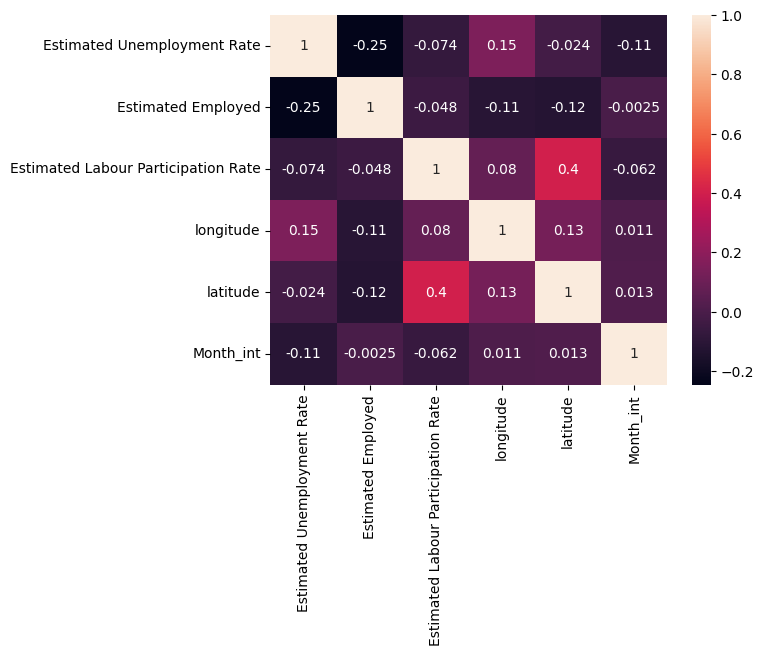

In [17]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [18]:
average_unemplo=df[['Region','Estimated Unemployment Rate']].groupby('Region').mean().reset_index()
average_unemplo_df=average_unemplo.sort_values(by='Estimated Unemployment Rate',ascending=False)
average_unemplo_df.head()

,Region,Estimated Unemployment Rate
1,North,15.889620
0,East,13.916000
2,Northeast,10.950263
3,South,10.454667
4,West,8.239000


Text(0.5, 1.0, 'Unemployment rate for each region')

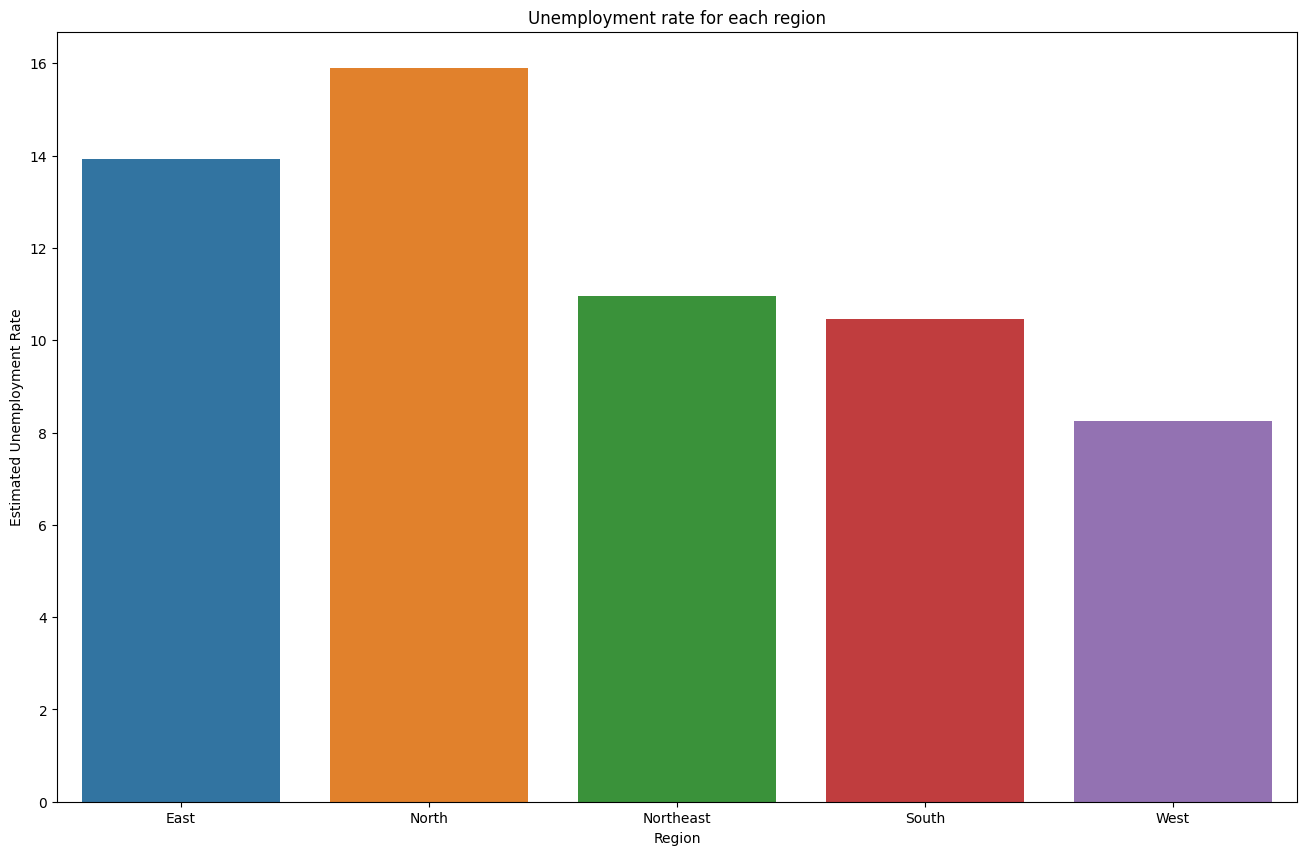

In [19]:
plt.figure(figsize=(16,10))
sns.barplot(data=average_unemplo_df,x='Region',y='Estimated Unemployment Rate')
plt.title('Unemployment rate for each region')

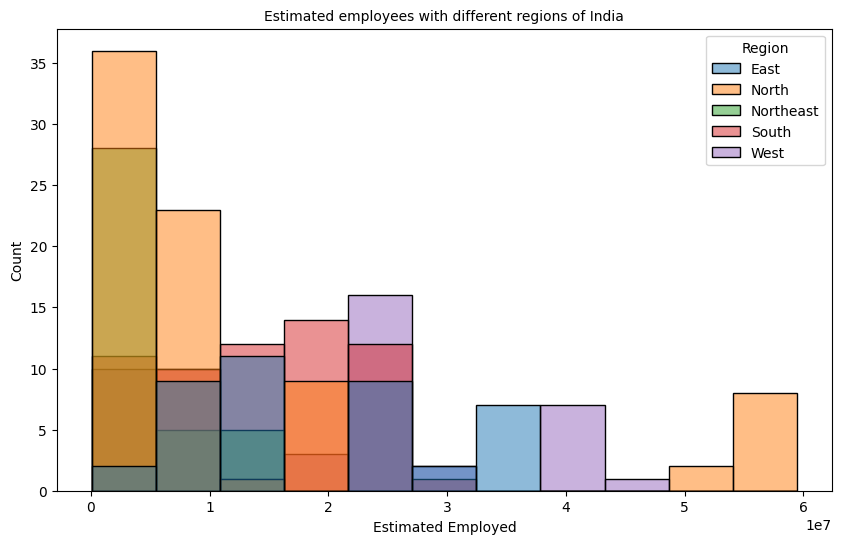

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Estimated Employed',hue='Region')
plt.title('Estimated employees with different regions of India',fontsize=10)
plt.show()

In [21]:
average=df[['States','Estimated Unemployment Rate']].groupby('States').mean().reset_index()
average_df=average.sort_values(by='Estimated Unemployment Rate',ascending=False)
average_df.head()

,States,Estimated Unemployment Rate
7,Haryana,27.477
23,Tripura,25.055
10,Jharkhand,19.539
2,Bihar,19.471
4,Delhi,18.414


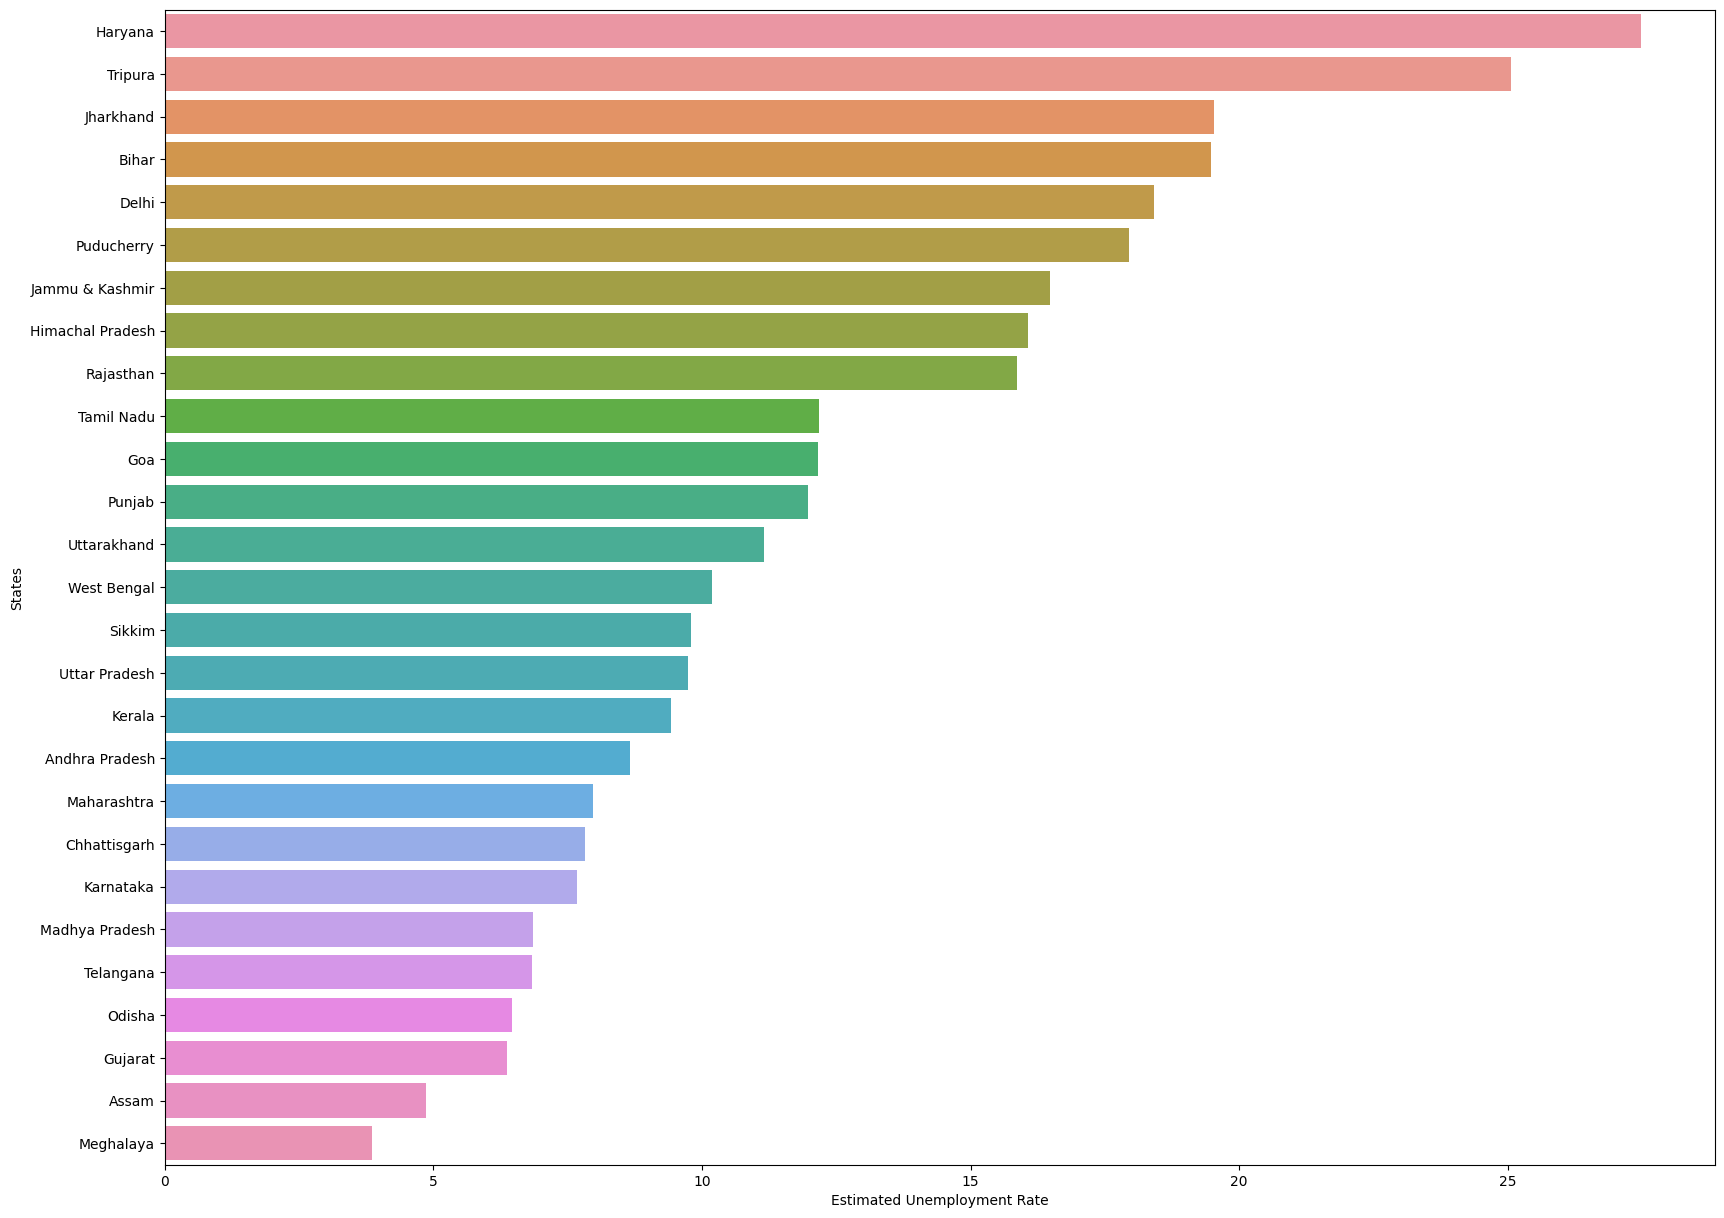

In [22]:
plt.figure(figsize=(20,15))
sns.barplot(data=average_df,y='States',x='Estimated Unemployment Rate')
plt.show()

# Top States with highest unemployement rate
1.Harayana
2.Tripura
3.Jharkhand
4.Bihar
5.Delhi